[View in Colaboratory](https://colab.research.google.com/github/gisazae/cryptographyPython/blob/master/StegoLSB.ipynb)

In [0]:
import numpy as np
import cv2
from skimage.io import imread
from skimage.io import imsave
from matplotlib import pyplot as plt

# <font color='red'>Imagen Original</font> 

In [2]:
#lectura de la imagen
img=imread('img2.jpg')
plt.imshow(img)
plt.show()
print (img.shape, type(img))
bin(255)
x = 17
"{0:08b}".format(x)

FileNotFoundError: ignored

# <font color='red'>Imagenes de cada plano de bits</font> 

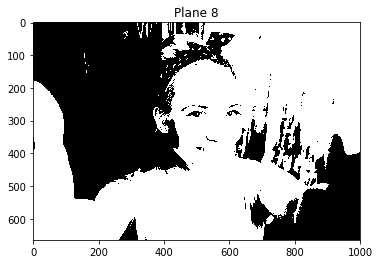

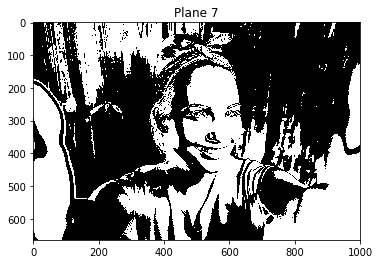

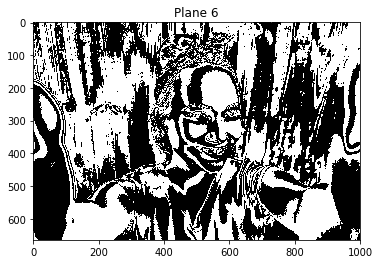

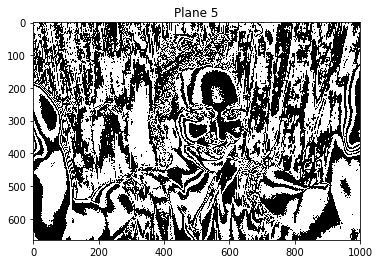

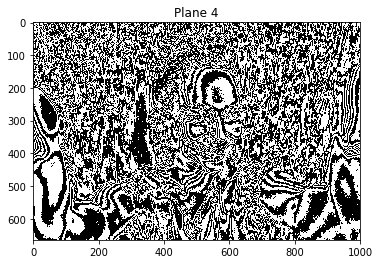

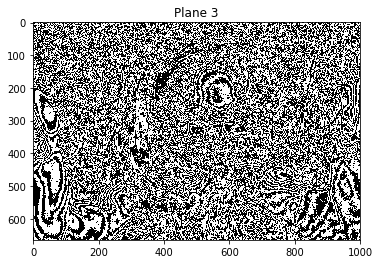

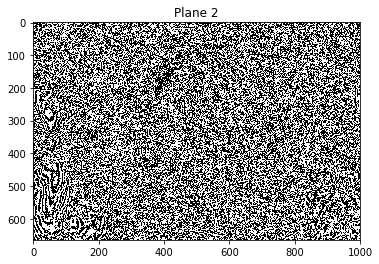

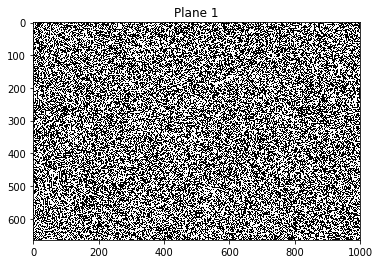

In [0]:
#funcion que pasa de decimal a binario
def binarizar(decimal):
    binario = ''
    while decimal // 2 != 0:
        binario = str(decimal % 2) + binario
        decimal = decimal // 2
    return str(decimal) + binario
# se elige el plano y se coloca 0 o 255 para resaltar el plano
for bit in range(8):
    img=imread('img2.jpg')
    img2=img
    height, width, channels = img.shape
    for x in range(0,height):
        for y in range(0,width):
            z=binarizar(img[x,y,0])
            #print(int(z))
            while len(z)<8:
                z='0'+z
            if z[bit]=='1':
                img2[x,y,0] = 255
                img2[x,y,1] = 255
                img2[x,y,2] = 255
            else:
                img2[x,y,0] = 0
                img2[x,y,1] = 0
                img2[x,y,2] = 0
    
    plt.title('Plane '+ str(8-bit))
    plt.imshow(img2)
    plt.show()  

# <font color='red'>Mensaje a ocultar</font> 

In [0]:
x=input('ingrese el mensaje a ocultar: ');
men=''
for i in range(len(x)):
    z=binarizar(ord(x[i]))
    while len(z)<8:
        z='0'+z
    men=z+men
print('el tamaño del mensaje es: ',len(men), 'bits')
print(men)

ingrese el mensaje a ocultar: El conocimiento humano constituye un circuito integrado por cuatro componentes: producción, circulación, apropiación y resignificación. Las instituciones de Educación Superior justifican su existencia y su funcionamiento en tanto responsables de dinamizar cada uno de estos cuatro componentes. En el cumplimiento de tal responsabilidad el conocimiento se asume como medio y como fin, lo cual se hace evidente en el compromiso con el desarrollo de la sociedad y con el desarrollo del conocimiento en todas sus formas (científico, religioso, filosófico y estético).   En cuanto medio, el conocimiento es necesario para la formación de profesionales y, en el ejercicio profesional, para la construcción de riqueza social, la superación de la pobreza y el aprovechamiento y protección de los ecosistemas de manera que se garantice la continuidad de todas las formas de vida; en este caso la pertinencia social de la Universidad se traduce en un compromiso con la formación d

# <font color='red'>Codificacion del bit menos significativo</font> 

In [0]:
img=imread('img2.jpg')
img2=img
pos=7
cont=0
ban=0
height, width, channels = img.shape
for x in range(0,height):
    if ban==1:
        break
    for y in range(0,width):
        z=binarizar(img[x,y,0])
        while len(z)<8:
            z='0'+z
        z=z[0:7]+men[cont]    
        img2[x,y,0] = int(str(z), 2)
        cont=cont+1
        if cont==len(men):
            ban=1
            break
imsave("Stego.bmp", img2)

In [0]:
img=imread('img2.jpg')
img2=imread('Stego.bmp')

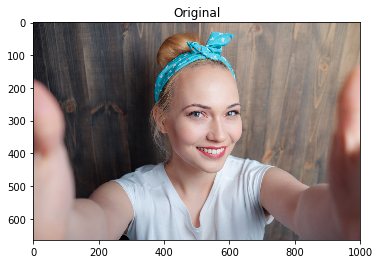

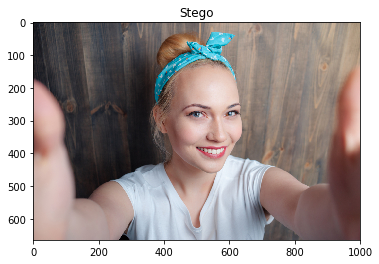

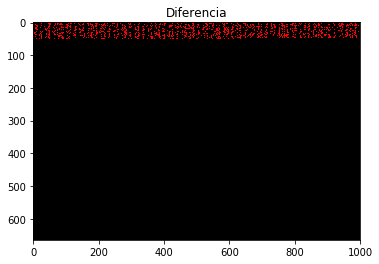

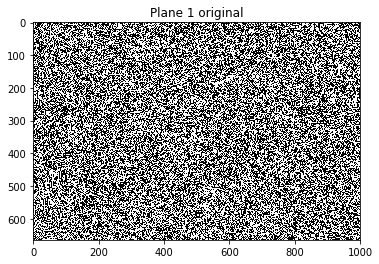

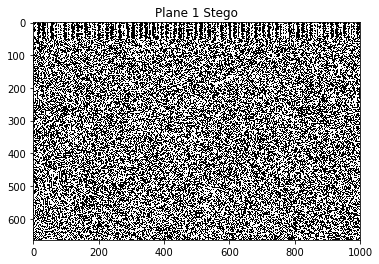

In [0]:
plt.title('Original')
plt.imshow(img)
plt.show()

plt.title('Stego')
plt.imshow(img2)
plt.show()

plt.title('Diferencia')
img3= img-img2
#plt.imshow(img3[:5,:160])
plt.imshow(img3)
plt.show()
img4=img

for x in range(0,height):
    for y in range(0,width):
        z=binarizar(img[x,y,0])
        while len(z)<8:
            z='0'+z
        if z[7]=='1':
            img4[x,y,0] = 255
            img4[x,y,1] = 255
            img4[x,y,2] = 255
        else:
            img4[x,y,0] = 0
            img4[x,y,1] = 0
            img4[x,y,2] = 0
    
plt.title('Plane 1 original')
plt.imshow(img4)
plt.show()  

img5=img2
for x in range(0,height):
    for y in range(0,width):
        z=binarizar(img2[x,y,0])
        while len(z)<8:
            z='0'+z
        if z[7]=='1':
            img5[x,y,0] = 255
            img5[x,y,1] = 255
            img5[x,y,2] = 255
        else:
            img5[x,y,0] = 0
            img5[x,y,1] = 0
            img5[x,y,2] = 0
    
plt.title('Plane 1 Stego')
plt.imshow(img5)
plt.show() 

# Es importante aclarar que este patrón de lineas verticales se da por el pequeño rango que trabaja el codigo ascii para los simbolos, es importante saber que para arreglar esto solo basta con colocar el mensaje de forma aleatoria e incriptado.

# <font color='red'>decodificacion del bit menos significativo</font> 

In [0]:
img=imread('Stego.bmp')
height, width, channels = img.shape
cont=0
ban=0
men2=''
for x in range(0,height):
    if ban==1:
        break
    for y in range(0,width):
        z=binarizar(img[x,y,0])
        while len(z)<8:
            z='0'+z
        men2=men2+z[7]
        cont=cont+1
        if cont==len(men):
            ban=1
            break

In [0]:
i=0
res=''
while i<len(men2):
    part=men2[i:i+8]
    res=(chr(int(str(part), 2)))+res
    i=i+8 
print(res)

El conocimiento humano constituye un circuito integrado por cuatro componentes: producción, circulación, apropiación y resignificación. Las instituciones de Educación Superior justifican su existencia y su funcionamiento en tanto responsables de dinamizar cada uno de estos cuatro componentes. En el cumplimiento de tal responsabilidad el conocimiento se asume como medio y como fin, lo cual se hace evidente en el compromiso con el desarrollo de la sociedad y con el desarrollo del conocimiento en todas sus formas (científico, religioso, filosófico y estético).   En cuanto medio, el conocimiento es necesario para la formación de profesionales y, en el ejercicio profesional, para la construcción de riqueza social, la superación de la pobreza y el aprovechamiento y protección de los ecosistemas de manera que se garantice la continuidad de todas las formas de vida; en este caso la pertinencia social de la Universidad se traduce en un compromiso con la formación de profesionales con competenci

In [0]:
observed, bin_edges = np.histogram(img, bins=list(range(257))) 

In [0]:
print(observed,bin_edges)

[ 1772  1703   756   299   151    97   105    85    68   117   171   201
   281   463   911  1588  2463  3721  4934  6141  6808  7284  7184  6996
  6500  6122  5833  6082  6197  6461  6812  7280  7636  7463  7244  7345
  7540  7587  7655  7497  7980  8133  8726  9120  9504 10015 10386 11020
 11758 12238 12565 11920 11456 10933 10420  9926  9783  9162  9306  9110
  8978  8748  8687  8319  8180  8053  8028  7951  8074  8221  8441  8241
  8271  8669  9005  8950  9306  8964  8598  8391  8291  8282  8429  8669
  8578  8360  8310  8073  7691  7584  7763  7725  7921  7937  8260  8168
  8505  8418  8590  8875  8920  8964  9529  9864  9652  9497  9226  8630
  8634  8643  8675  8750  9111  9309  9616  9599  9532  9486  9530  9572
  9711  9760 10036 10537 10879 11195 11231 11522 12143 12186 12088 12304
 12373 12307 12397 12804 13179 13153 13410 13522 14030 13727 13797 13515
 13802 12726 12597 12698 12604 12377 12641 12367 12441 12531 12234 12527
 12997 13396 12802 12182 11680 11327 11275 11007 10

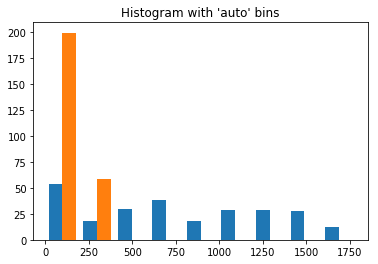

In [0]:
plt.hist(his, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()

In [0]:
print('hola')

hola
